# OmniSci [Vega Tutorial](https://www.omnisci.com/docs/latest/6_vegaTutorials.html)

Let's go through the OmniSci vega tutorial, but try to replicate as much as possible with Altair / Vega Lite.

In [1]:
import altair as alt
import ibis
import jupyterlab_omnisci

alt.data_transformers.enable('ibis')

DataTransformerRegistry.enable('ibis')

In [2]:
conn = ibis.mapd.connect(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)

In [3]:
t = conn.table('tweets_nov_feb')

In [4]:
expr = t[t.goog_x, t.goog_y]

In [5]:
c = alt.Chart(expr, width=384, height=564).mark_rect().encode(
    alt.X('goog_x:Q', bin=alt.Bin(maxbins=384)),
    alt.Y('goog_y:Q', bin=alt.Bin(maxbins=564)),
).transform_filter(
    alt.FieldRangePredicate(field='goog_x', range=[-3650484.1235206556, 7413325.514451755])
).transform_filter(
    alt.FieldRangePredicate(field='goog_y', range=[-5778161.9183506705, 10471808.487466192])
)

<IPython.core.display.JSON object>

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb

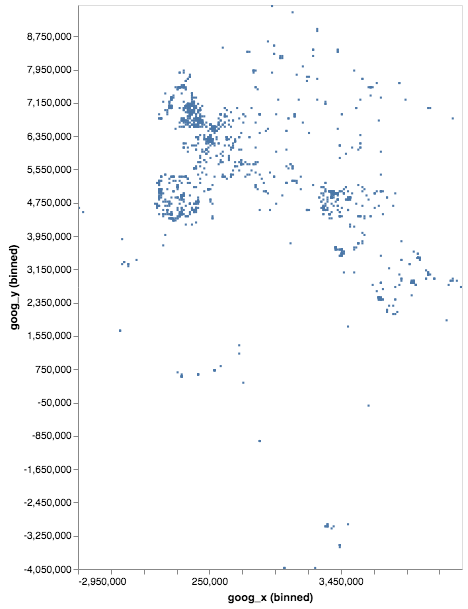

<IPython.core.display.JSON object>

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb

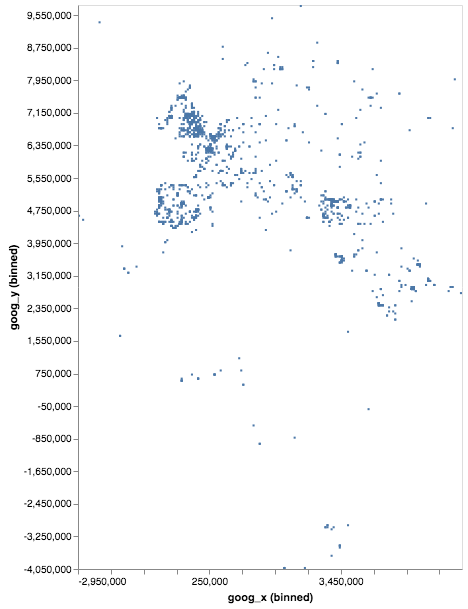

<IPython.core.display.JSON object>

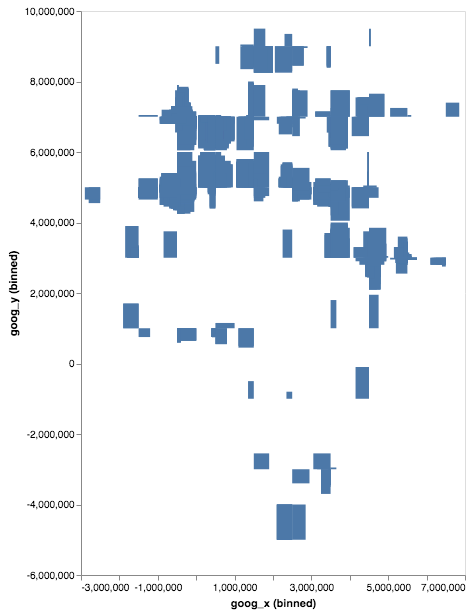

<IPython.core.display.JSON object>

SELECT "goog_x", "goog_y"
FROM tweets_nov_feb

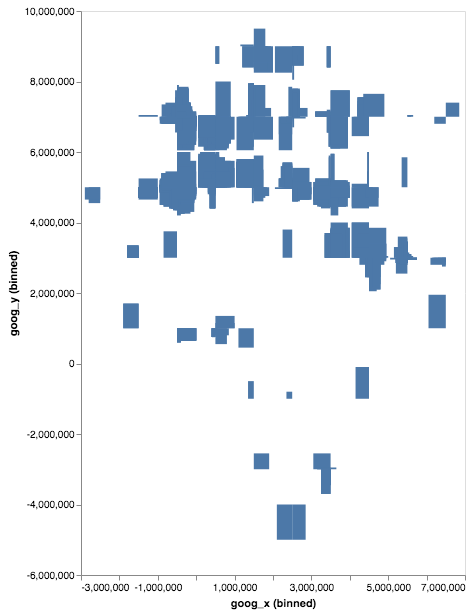

In [6]:
jupyterlab_omnisci.display_chart(c)

## "Getting More from Your Data"

/usr/local/miniconda3/envs/jupyterlab-omnisci/lib/python3.6/site-packages/altair/utils/core.py:86: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


<IPython.core.display.JSON object>

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb

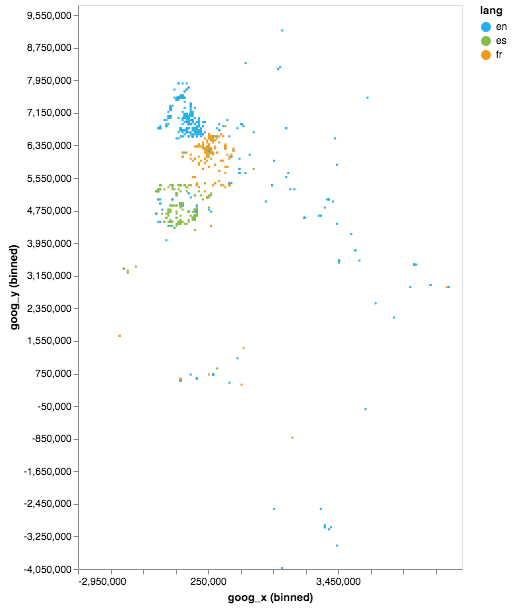

<IPython.core.display.JSON object>

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb

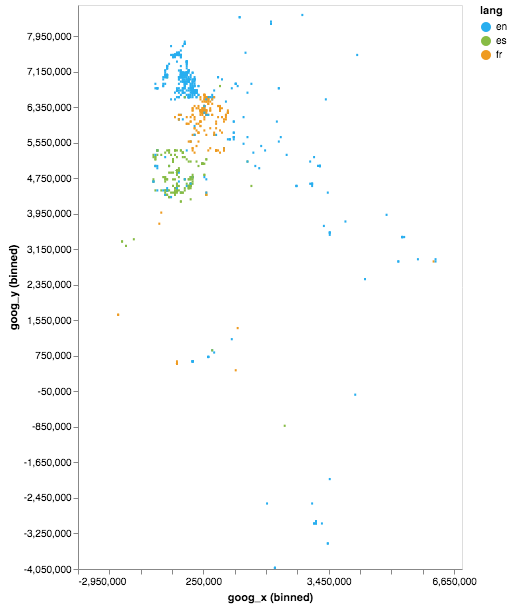

<IPython.core.display.JSON object>

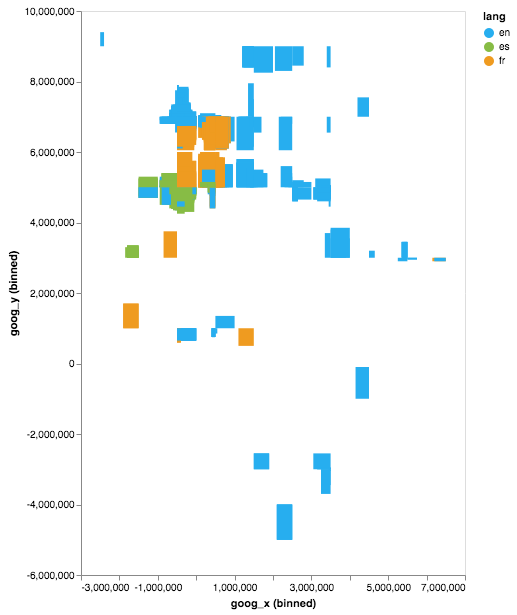

<IPython.core.display.JSON object>

SELECT "goog_x", "goog_y", "lang"
FROM tweets_nov_feb

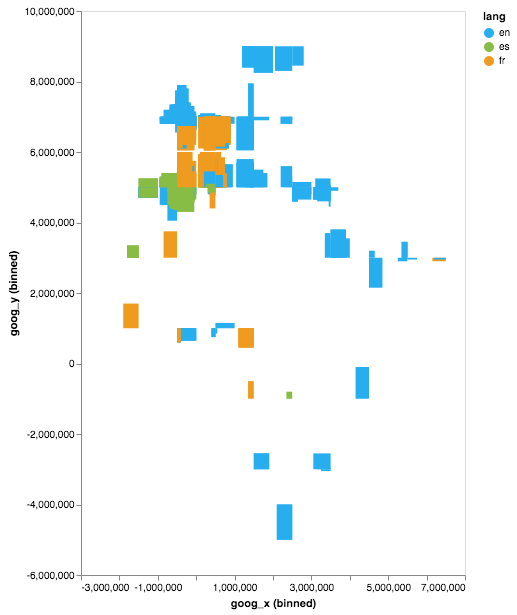

In [19]:
# can't set all to grey
# https://github.com/vega/vega-lite/issues/4255

jupyterlab_omnisci.display_chart(alt.Chart(
    t[t.goog_x, t.goog_y, t.lang],
    width=384,
    height=564
).mark_rect().encode(
    alt.X('goog_x:Q', bin=alt.Bin(maxbins=384)),
    alt.Y('goog_y:Q', bin=alt.Bin(maxbins=564)),
    color=alt.Color(
        'lang',
        scale=alt.Scale(
            domain=["en",  "es", "fr"],
            range=["#27aeef", "#87bc45", "#ef9b20"],
        ),
    )
).transform_filter(
    alt.FieldRangePredicate(field='goog_x', range=[-3650484.1235206556, 7413325.514451755])
).transform_filter(
    alt.FieldRangePredicate(field='goog_y', range=[-5778161.9183506705, 10471808.487466192])
))

### "Creating More Advanced Charts"

In [10]:
t2 = conn.table("contributions_donotmodify")

<IPython.core.display.JSON object>

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify

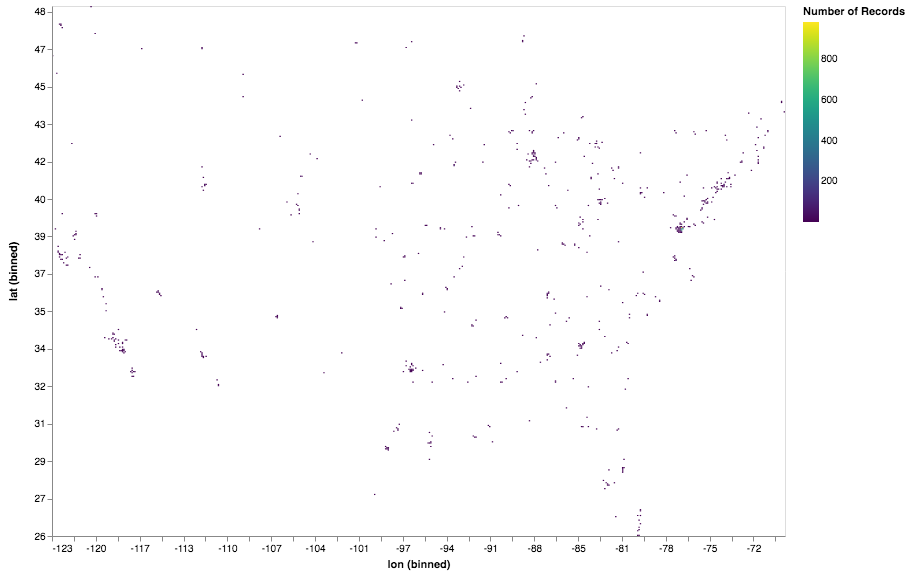

<IPython.core.display.JSON object>

SELECT "lon", "lat", "recipient_party", "amount"
FROM contributions_donotmodify

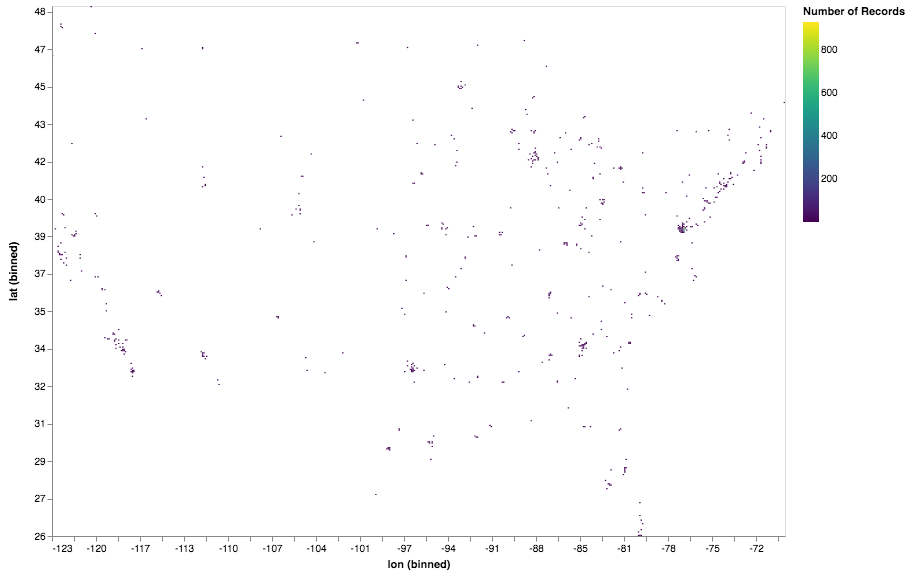

<IPython.core.display.JSON object>

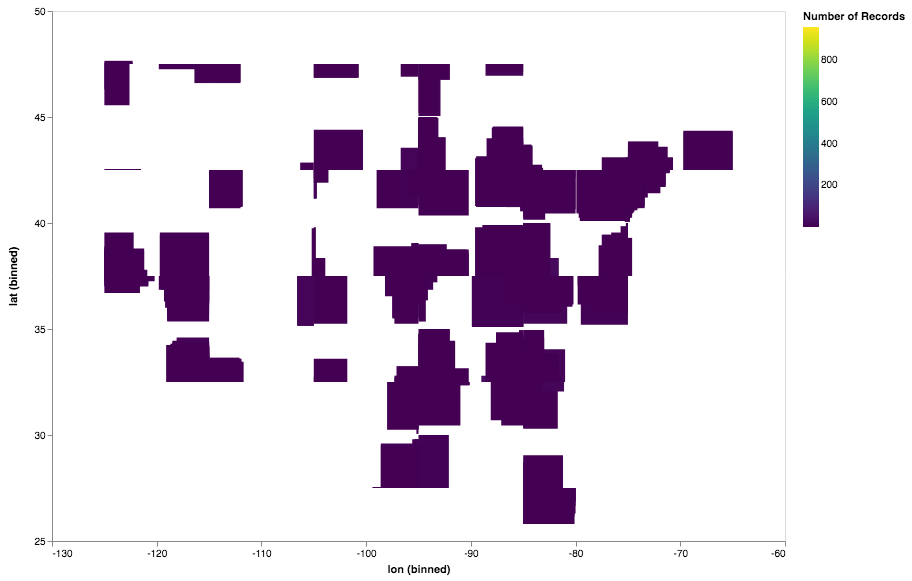

<IPython.core.display.JSON object>

Waiting for transformed spec...

In [11]:
c = alt.Chart(
    t2[t2.lon, t2.lat, t2.recipient_party, t2.amount],
    width=733,
    height=530
).mark_rect().encode(
    alt.X('lon:Q', bin=alt.Bin(maxbins=733)),
    alt.Y('lat:Q', bin=alt.Bin(maxbins=530)),
    alt.Color('count(lon):Q')
).transform_filter(
    alt.FieldRangePredicate(field='lon', range=[-124.39000000000038, -66.93999999999943])
).transform_filter(
    alt.FieldRangePredicate(field='lat', range=[20.61570573311549, 52.93117449504004])
).transform_filter(
    alt.FieldEqualPredicate('R', 'recipient_party'),
).transform_filter(
    alt.FieldGTPredicate('amount', 0)
)
jupyterlab_omnisci.display_chart(c)

### "Working with Polys Marks Type"

TODO: Not sure how to query poly data with ibis

## Vega Accumulator
TODO: Add https://www.omnisci.com/docs/latest/6_vegaAccumulatorExample.html examples